In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
continous = ['PassengerId','Age','Fare']
discrete_categorical = ['Name','Sex','Cabin','Embarked','Ticket']
discrete_count = ['Survived','Pclass','SibSp','Parch']

##### going to drop column ---> 
      passid(unique)
      name(unique)
      ticket(alpha numeric value)
      cabin (nmore than 30% missing value)

In [6]:
df['PassengerId'].nunique()   ## This column is going to be drop because of unique values

891

In [7]:
df['Survived'].nunique()  ## Output column

2

In [8]:
df['Pclass'].nunique()  

3

In [9]:
df['Name'].nunique()  ## This column is going to drop because of unique values

891

In [10]:
df['Sex'].nunique()  

2

In [11]:
df['Age'].nunique()  

88

In [12]:
df['SibSp'].nunique()  

7

In [13]:
df['Parch'].nunique()  

7

In [14]:
df['Ticket'].nunique()  

681

In [15]:
df['Fare'].nunique()  

248

In [16]:
df['Cabin'].nunique()  

147

In [17]:
df['Embarked'].nunique()  

3

# Data Preprocessing

## Data Cleaning

In [18]:
df.drop(columns=['PassengerId','Name','Ticket'],inplace = True)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,S
887,1,1,female,19.0,0,0,30.0000,B42,S
888,0,3,female,NaN,1,2,23.4500,NaN,S
889,1,1,male,26.0,0,0,30.0000,C148,C


In [19]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,S
887,1,1,female,19.0,0,0,30.0000,B42,S
888,0,3,female,NaN,1,2,23.4500,NaN,S
889,1,1,male,26.0,0,0,30.0000,C148,C


### Wrong Data

Here no wrong Data present

### Wrong Datatype

Here is also no wrong Datatype present 

### Duplicate Value

In [20]:
df.duplicated().sum()

107

In [21]:
df[df.duplicated()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
47,1,3,female,NaN,0,0,7.7500,NaN,Q
76,0,3,male,NaN,0,0,7.8958,NaN,S
77,0,3,male,NaN,0,0,8.0500,NaN,S
87,0,3,male,NaN,0,0,8.0500,NaN,S
95,0,3,male,NaN,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
870,0,3,male,26.0,0,0,7.8958,NaN,S
877,0,3,male,19.0,0,0,7.8958,NaN,S
878,0,3,male,NaN,0,0,7.8958,NaN,S
884,0,3,male,25.0,0,0,7.0500,NaN,S


In [22]:
df.drop_duplicates(ignore_index = True , inplace = True)

In [23]:
df.duplicated().sum()

0

In [24]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
779,0,3,female,39.0,0,5,29.1250,NaN,Q
780,1,1,female,19.0,0,0,30.0000,B42,S
781,0,3,female,NaN,1,2,23.4500,NaN,S
782,1,1,male,26.0,0,0,30.0000,C148,C


### Missing value

In [25]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         106
SibSp         0
Parch         0
Fare          0
Cabin       581
Embarked      2
dtype: int64

In [26]:
df['Cabin'].isnull().sum()/len(df)    ## This column is also going to drop because here missing value is more than 30%

0.7410714285714286

In [27]:
df['Age'].isnull().sum()/len(df)    ## This missing value is going to fill by bell curve because on m-d and m+d maximum data present.

0.13520408163265307

In [28]:
df['Embarked'].isnull().sum()/len(df)   ## This missing value is going to fill by mode

0.002551020408163265

In [29]:
df.drop('Cabin',axis = 1,inplace = True)

In [30]:
df  ## total columns drop = passengerid, name, ticket,cabin

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
779,0,3,female,39.0,0,5,29.1250,Q
780,1,1,female,19.0,0,0,30.0000,S
781,0,3,female,NaN,1,2,23.4500,S
782,1,1,male,26.0,0,0,30.0000,C


In [31]:
df.shape

(784, 8)

In [32]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         106
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [33]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace = True)    

In [34]:
df['Embarked'].value_counts()

S    570
C    155
Q     59
Name: Embarked, dtype: int64

In [35]:
df['Embarked'].isnull().sum()/len(df)    

0.0

In [36]:
train_age = np.random.randint((df['Age'].mean()-df['Age'].std()),(df['Age'].mean()+df['Age'].std()),106)

In [37]:
df['Age'].isnull().sum()

106

In [38]:
train_age .shape

(106,)

In [39]:
df['Age'][df['Age'].isnull()]

5     NaN
17    NaN
19    NaN
26    NaN
28    NaN
       ..
733   NaN
741   NaN
749   NaN
766   NaN
781   NaN
Name: Age, Length: 106, dtype: float64

In [40]:
df['Age'][df['Age'].isnull()] = train_age 

In [41]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

### Outliers

In [42]:
df[['Age','Fare']].describe()

,Age,Fare
count,784.000000,784.000000
mean,29.575791,34.711740
std,14.066601,52.160151
min,0.420000,0.000000
25%,20.000000,8.050000
50%,28.000000,15.900000
75%,38.000000,34.109350
max,80.000000,512.329200


In [43]:
q1 = df['Age'].quantile(0.25)

In [44]:
q3 = df['Age'].quantile(0.75)

In [45]:
IQR = q3-q1
IQR

18.0

In [46]:
ll = q1 - (1.5*IQR)
ll

-7.0

In [47]:
ul = q3+(1.5*IQR)
ul

65.0

In [48]:
df[(df['Age']>ul) | (df['Age']<ll)]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
33,0,2,male,66.0,0,0,10.5000,S
91,0,1,male,71.0,0,0,34.6542,C
110,0,3,male,70.5,0,0,7.7500,Q
443,0,1,male,71.0,0,0,49.5042,C
561,1,1,male,80.0,0,0,30.0000,S
594,0,2,male,70.0,0,0,10.5000,S
658,0,1,male,70.0,1,1,71.0000,S
751,0,3,male,74.0,0,0,7.7750,S


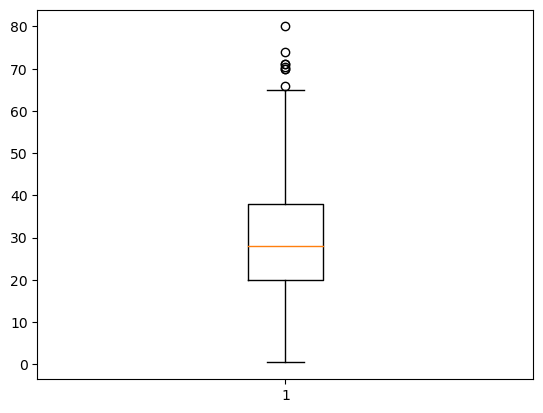

In [49]:
# Graph
plt.boxplot(df['Age'])
plt.show()

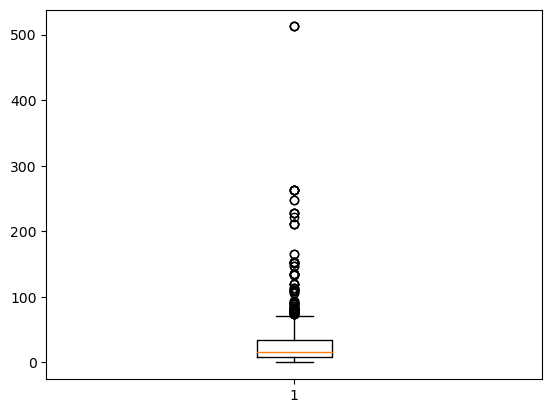

In [50]:
plt.boxplot(df['Fare'])
plt.show()    ## Here we Retrain the outlier because high class people rescue 1st....

In [51]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

## Data Preprocessing

In [52]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
779,0,3,female,39.0,0,5,29.1250,Q
780,1,1,female,19.0,0,0,30.0000,S
781,0,3,female,39.0,1,2,23.4500,S
782,1,1,male,26.0,0,0,30.0000,C


In [53]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000
mean,0.411990,2.243622,29.575791,0.522959,0.415816,34.711740
std,0.492507,0.855056,14.066601,0.986231,0.836922,52.160151
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,15.900000
75%,1.000000,3.000000,38.000000,1.000000,1.000000,34.109350
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [54]:
df[['Sex','Embarked']].describe()

,Sex,Embarked
count,784,784
unique,2,3
top,male,S
freq,491,570


In [55]:
c_m = df.corr()

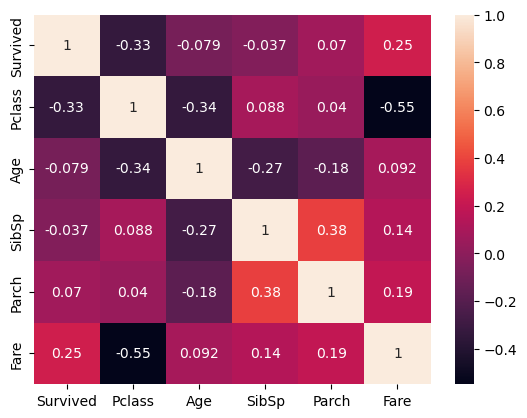

In [56]:
sns.heatmap(c_m,annot = True)   # Here maximum I/P  column have low corelation between the output column.
plt.show()

In [57]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

## Data Transformation
#### skewed to normal.

In [58]:
df['Age'].skew()   

0.411292560839334

In [59]:
df['Fare'].skew()

4.570768460673977

In [60]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [61]:
df['Fare'].isnull().sum()

0

In [62]:
df['Fare'][df['Fare']<= 0] ## Due to 0 is present in the fare column after applying log it showa null value.

170    0.0
247    0.0
255    0.0
260    0.0
283    0.0
533    0.0
564    0.0
712    0.0
720    0.0
727    0.0
Name: Fare, dtype: float64

In [63]:
# Convert right skewnwss of fare to normal
# Log
#df['Fare'] = np.log(df['Fare'])
# so this  normallogarithm method is not going to use
# we can apply function on that column


In [64]:
a = np.log1p(df['Fare'])
a.skew()

0.41616155760723034

In [65]:
df['Fare'] = np.log1p(df['Fare'])
df['Fare'].skew()

0.41616155760723034

## Data warngling

In [66]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,2.110213,S
1,1,1,female,38.0,1,0,4.280593,C
2,1,3,female,26.0,0,0,2.188856,S
3,1,1,female,35.0,1,0,3.990834,S
4,0,3,male,35.0,0,0,2.202765,S
...,...,...,...,...,...,...,...,...
779,0,3,female,39.0,0,5,3.405355,Q
780,1,1,female,19.0,0,0,3.433987,S
781,0,3,female,39.0,1,2,3.196630,S
782,1,1,male,26.0,0,0,3.433987,C


In [67]:
# df1= pd.get_dummies(df['Embarked'],drop_first = True)
# df1

In [68]:
res = pd.get_dummies(df['Embarked'],drop_first = True)

In [69]:
df = pd.concat([df,res],axis = 1)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Q,S
0,0,3,male,22.0,1,0,2.110213,S,0,1
1,1,1,female,38.0,1,0,4.280593,C,0,0
2,1,3,female,26.0,0,0,2.188856,S,0,1
3,1,1,female,35.0,1,0,3.990834,S,0,1
4,0,3,male,35.0,0,0,2.202765,S,0,1
...,...,...,...,...,...,...,...,...,...,...
779,0,3,female,39.0,0,5,3.405355,Q,1,0
780,1,1,female,19.0,0,0,3.433987,S,0,1
781,0,3,female,39.0,1,2,3.196630,S,0,1
782,1,1,male,26.0,0,0,3.433987,C,0,0


In [70]:
df['Sex'] = df['Sex'].map({'female':0,'male':1})

In [71]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Q           0
S           0
dtype: int64

In [72]:
## here we drop passenger id, name , cabin and ticket
## And 

# For Test Data

In [73]:
df1 = pd.read_csv("test.csv")
df1

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [74]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [75]:
df1.drop(columns = ['PassengerId','Name','Ticket','Cabin'],inplace = True)

In [76]:
df1

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500,S
414,1,female,39.0,0,0,108.9000,C
415,3,male,38.5,0,0,7.2500,S
416,3,male,NaN,0,0,8.0500,S


In [77]:
df1.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [78]:
test_age = np.random.randint((df1['Age'].mean()-df1['Age'].std()),(df1['Age'].mean()+df1['Age'].std()),86)

In [79]:
df1['Age'][df1['Age'].isnull()] = test_age  

In [80]:
df1.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

In [81]:
df1['Fare'].fillna(df1['Fare'].mean(),inplace = True)

In [82]:
df1.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [83]:
df1['Fare'] = np.log1p(df1['Fare'])
df1['Fare'].skew()

0.8582347454671777

In [84]:
df1['Age'].skew()

0.4591948271061353

In [85]:
res1 = pd.get_dummies(df1['Embarked'],drop_first = True)

In [86]:
res1

,Q,S
0,1,0
1,0,1
2,1,0
3,0,1
4,0,1
...,...,...
413,0,1
414,0,0
415,0,1
416,0,1


In [87]:
df1 = pd.concat([df1,res1],axis = 1)
df1

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Q,S
0,3,male,34.5,0,0,2.178064,Q,1,0
1,3,female,47.0,1,0,2.079442,S,0,1
2,2,male,62.0,0,0,2.369075,Q,1,0
3,3,male,27.0,0,0,2.268252,S,0,1
4,3,female,22.0,1,1,2.586824,S,0,1
...,...,...,...,...,...,...,...,...,...
413,3,male,33.0,0,0,2.202765,S,0,1
414,1,female,39.0,0,0,4.699571,C,0,0
415,3,male,38.5,0,0,2.110213,S,0,1
416,3,male,41.0,0,0,2.202765,S,0,1


In [88]:
df1['Sex'] = df1['Sex'].map({'female':0,'male':1})

In [89]:
df1.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Q           0
S           0
dtype: int64

In [90]:
df1

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Q,S
0,3,1,34.5,0,0,2.178064,Q,1,0
1,3,0,47.0,1,0,2.079442,S,0,1
2,2,1,62.0,0,0,2.369075,Q,1,0
3,3,1,27.0,0,0,2.268252,S,0,1
4,3,0,22.0,1,1,2.586824,S,0,1
...,...,...,...,...,...,...,...,...,...
413,3,1,33.0,0,0,2.202765,S,0,1
414,1,0,39.0,0,0,4.699571,C,0,0
415,3,1,38.5,0,0,2.110213,S,0,1
416,3,1,41.0,0,0,2.202765,S,0,1


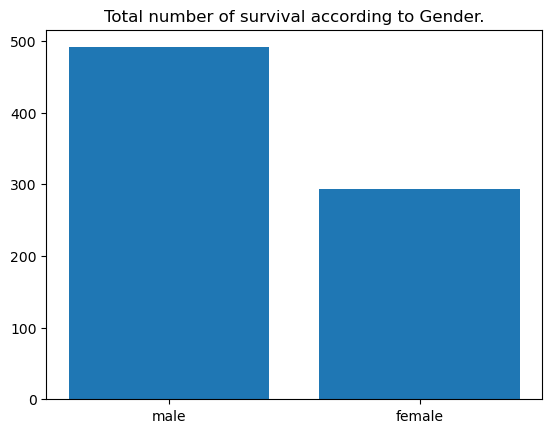

In [91]:
total_number_of_male = len(df[df['Sex']== 1])
total_number_of_female = len(df[df['Sex']== 0])
y_axis =[total_number_of_male,total_number_of_female]
x_axis = ['male','female']
plt.bar(x_axis,y_axis)
plt.title("Total number of survival according to Gender.")
plt.show()

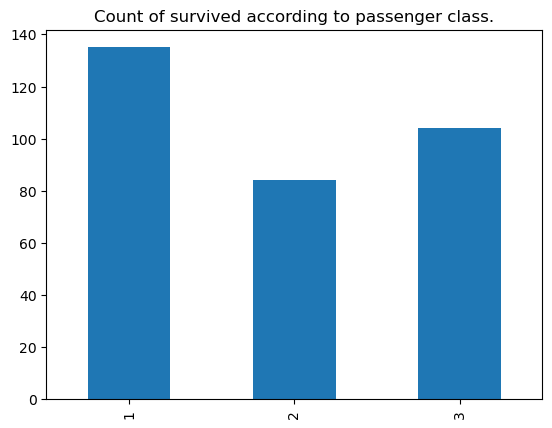

In [92]:
df.loc[df['Survived'] == 1, 'Pclass'].value_counts().sort_index().plot.bar()
plt.title("Count of survived according to passenger class.")
plt.show()

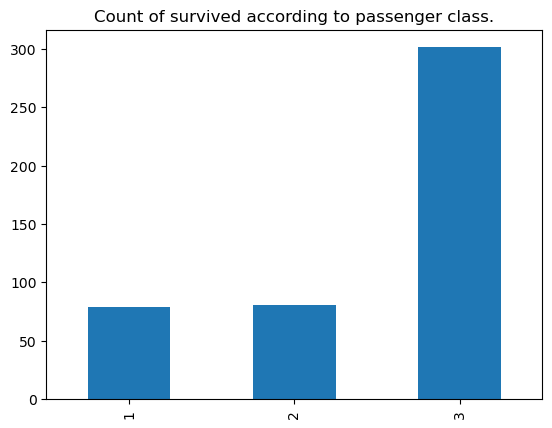

In [93]:
df.loc[df['Survived'] == 0, 'Pclass'].value_counts().sort_index().plot.bar()
plt.title("Count of survived according to passenger class.")
plt.show()

## Machine Learning

##### Here it is a supervised learning and o/p column is here classification so here we are going to apply Classification.

#### Define X & y

In [94]:
X_train = df.drop(columns = ['Embarked','Survived'])
y_train = df['Survived']
X_test = df1.drop(columns = ['Embarked'])
# y_test = df1['Survived']

In [95]:
X_train.isnull().sum()

Pclass    0
Sex       0
Age       0
SibSp     0
Parch     0
Fare      0
Q         0
S         0
dtype: int64

In [96]:
X_train
column_name = X_train.columns
column_name

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Q', 'S'], dtype='object')

In [97]:
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,3,1,34.5,0,0,2.178064,1,0
1,3,0,47.0,1,0,2.079442,0,1
2,2,1,62.0,0,0,2.369075,1,0
3,3,1,27.0,0,0,2.268252,0,1
4,3,0,22.0,1,1,2.586824,0,1
...,...,...,...,...,...,...,...,...
413,3,1,33.0,0,0,2.202765,0,1
414,1,0,39.0,0,0,4.699571,0,0
415,3,1,38.5,0,0,2.110213,0,1
416,3,1,41.0,0,0,2.202765,0,1


#### Scalling

In [98]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

In [99]:
X_train = pd.DataFrame(X_train,columns = column_name)
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,0.885158,0.772490,-0.538910,0.484009,-0.497157,-0.965846,-0.285271,0.612730
1,-1.455362,-1.294515,0.599263,0.484009,-0.497157,1.283765,-0.285271,-1.632039
2,0.885158,-1.294515,-0.254367,-0.530599,-0.497157,-0.884332,-0.285271,0.612730
3,-1.455362,-1.294515,0.385855,0.484009,-0.497157,0.983428,-0.285271,0.612730
4,0.885158,0.772490,0.385855,-0.530599,-0.497157,-0.869916,-0.285271,0.612730
...,...,...,...,...,...,...,...,...
779,0.885158,-1.294515,0.670398,-0.530599,5.480926,0.376576,3.505444,-1.632039
780,-1.455362,-1.294515,-0.752317,-0.530599,-0.497157,0.406253,-0.285271,0.612730
781,0.885158,-1.294515,0.670398,0.484009,1.894076,0.160231,-0.285271,0.612730
782,-1.455362,0.772490,-0.254367,-0.530599,-0.497157,0.406253,-0.285271,-1.632039


In [100]:
X_test = sc.transform(X_test)

In [101]:
X_test = pd.DataFrame(X_test,columns = column_name)
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,0.885158,0.772490,0.350287,-0.530599,-0.497157,-0.895518,3.505444,-1.632039
1,0.885158,-1.294515,1.239484,0.484009,-0.497157,-0.997741,-0.285271,0.612730
2,-0.285102,0.772490,2.306521,-0.530599,-0.497157,-0.697535,3.505444,-1.632039
3,0.885158,0.772490,-0.183231,-0.530599,-0.497157,-0.802038,-0.285271,0.612730
4,0.885158,-1.294515,-0.538910,0.484009,0.698460,-0.471837,-0.285271,0.612730
...,...,...,...,...,...,...,...,...
413,0.885158,0.772490,0.243584,-0.530599,-0.497157,-0.869916,-0.285271,0.612730
414,-1.455362,-1.294515,0.670398,-0.530599,-0.497157,1.718038,-0.285271,-1.632039
415,0.885158,0.772490,0.634830,-0.530599,-0.497157,-0.965846,-0.285271,0.612730
416,0.885158,0.772490,0.812670,-0.530599,-0.497157,-0.869916,-0.285271,0.612730


# Modelling

## LOGISTIC REGRESSION

In [102]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(X_train,y_train)

LogisticRegression()

In [103]:
## yprediction
ypred_train = log_model.predict(X_train)

In [104]:
## Evolution
from sklearn.metrics import accuracy_score
print("Train Accuracy Score : ",accuracy_score(y_train,ypred_train))

## Cross validation Score
from sklearn.model_selection import cross_val_score
cross_validation_score = cross_val_score(log_model,X_train,y_train,cv = 5,scoring = 'accuracy')
print("Cross Validation Score : ",cross_validation_score.mean())

Train Accuracy Score :  0.7755102040816326
Cross Validation Score :  0.7589743589743589


## KNN

In [105]:
# Hyper parameter tuning
# Base model witrh default parameter
from sklearn.neighbors import KNeighborsClassifier
estimator = KNeighborsClassifier()
## Parameter set
param_grid = {'n_neighbors' : list(range(1,100)) }
from sklearn.model_selection import GridSearchCV
cv_classifier = GridSearchCV(estimator,param_grid,cv = 5,scoring ='accuracy')
cv_classifier.fit(X_train,y_train)
cv_classifier.best_params_

{'n_neighbors': 8}

In [106]:
## best model
knn_model = KNeighborsClassifier(n_neighbors=12)
knn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=12)

In [107]:
## Prediction
ypred_train = knn_model.predict(X_train)

In [108]:
## Evolution
from sklearn.metrics import accuracy_score
print("Train Accuracy Score : ",accuracy_score(y_train,ypred_train))

## Cross validation Score
from sklearn.model_selection import cross_val_score
cross_validation_score = cross_val_score(knn_model,X_train,y_train,cv = 5,scoring = 'accuracy')
print("Cross Validation Score : ",cross_validation_score.mean())

Train Accuracy Score :  0.8239795918367347
Cross Validation Score :  0.7857749469214437


## SUPPORT VECTOR MACHINE

In [109]:
l = []
x =0
while x<100:
    l.append(x)
    x = x+0.01

In [110]:
# # Hyperparameter Tuning
# # Base model with default parameter
# from sklearn.svm import SVC
# estimator = SVC()
# ## Parameters
# param_grid = {'C':l,'kernel':['linear','rbf','sigmoid','poly']}
# grid = GridSearchCV(estimator,param_grid,cv = 5,scoring = 'accuracy')
# grid.fit(X_train,y_train)
# grid.best_params_

In [111]:
# Best Model
from sklearn.svm import SVC
svm_model = SVC(kernel = 'rbf',C = 1.2500000000000009)
svm_model.fit(X_train,y_train)

SVC(C=1.2500000000000009)

In [112]:
# Prediction
ypred_train = svm_model.predict(X_train)

In [113]:
## Evolution
from sklearn.metrics import accuracy_score
print("Train Accuracy Score : ",accuracy_score(y_train,ypred_train))

## Cross validation Score
from sklearn.model_selection import cross_val_score
cross_validation_score = cross_val_score(svm_model,X_train,y_train,cv = 5,scoring = 'accuracy')
print("Cross Validation Score : ",cross_validation_score.mean())

Train Accuracy Score :  0.826530612244898
Cross Validation Score :  0.8011105667156624


## DECISION TREE

In [114]:
# ## Base Model
# from sklearn.tree import DecisionTreeClassifier
# model = DecisionTreeClassifier(random_state = 0)
# model.fit(X_train,y_train)
# ypred_train = model.predict(X_train)
# ## Evolution
# from sklearn.metrics import accuracy_score
# print("Train Accuracy Score : ",accuracy_score(y_train,ypred_train))

# ## Cross validation Score
# from sklearn.model_selection import cross_val_score
# cross_validation_score = cross_val_score(svm_model,X_train_imp,y_train,cv = 5,scoring = 'accuracy')
# print("Cross Validation Score : ",cross_validation_score.mean())

In [115]:
# model.()

In [116]:
## Base model and finding hyperparameter tuning
from sklearn.tree import DecisionTreeClassifier
estimator = DecisionTreeClassifier(random_state = 0)
## Parameter set
param_grid = {'criterion':['gini','entropy'],"max_depth":[1,2,3,4,5,4,5,None]}
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator,param_grid,cv = 5,scoring = 'accuracy')
grid.fit(X_train,y_train)
grid.best_params_

{'criterion': 'gini', 'max_depth': 4}

In [117]:
X_train.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Q', 'S'], dtype='object')

In [118]:
## Choosing best features
grid.best_estimator_.feature_importances_

array([0.23629514, 0.56416108, 0.08444307, 0.04962705, 0.00882695,
       0.05664672, 0.        , 0.        ])

In [119]:
feats = pd.DataFrame(data = grid.best_estimator_.feature_importances_,index = X_train.columns,columns = ['Feature Importance'])
feature_important = feats[feats['Feature Importance']>0]
list_of_important_feature = feature_important.index.to_list()

In [120]:
list_of_important_feature


['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']

In [121]:
X_train_imp = X_train[list_of_important_feature]

In [122]:
## Best model
dt_model =DecisionTreeClassifier(criterion = 'entropy',random_state = 0,max_depth = 4)
dt_model.fit(X_train_imp,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)

In [123]:
## Prediction
ypred_train = dt_model.predict(X_train_imp)

In [124]:
## Evolution
from sklearn.metrics import accuracy_score
print("Train Accuracy Score : ",accuracy_score(y_train,ypred_train))

## Cross validation Score
from sklearn.model_selection import cross_val_score
cross_validation_score = cross_val_score(svm_model,X_train_imp,y_train,cv = 5,scoring = 'accuracy')
print("Cross Validation Score : ",cross_validation_score.mean())

Train Accuracy Score :  0.8125
Cross Validation Score :  0.7972562469377757


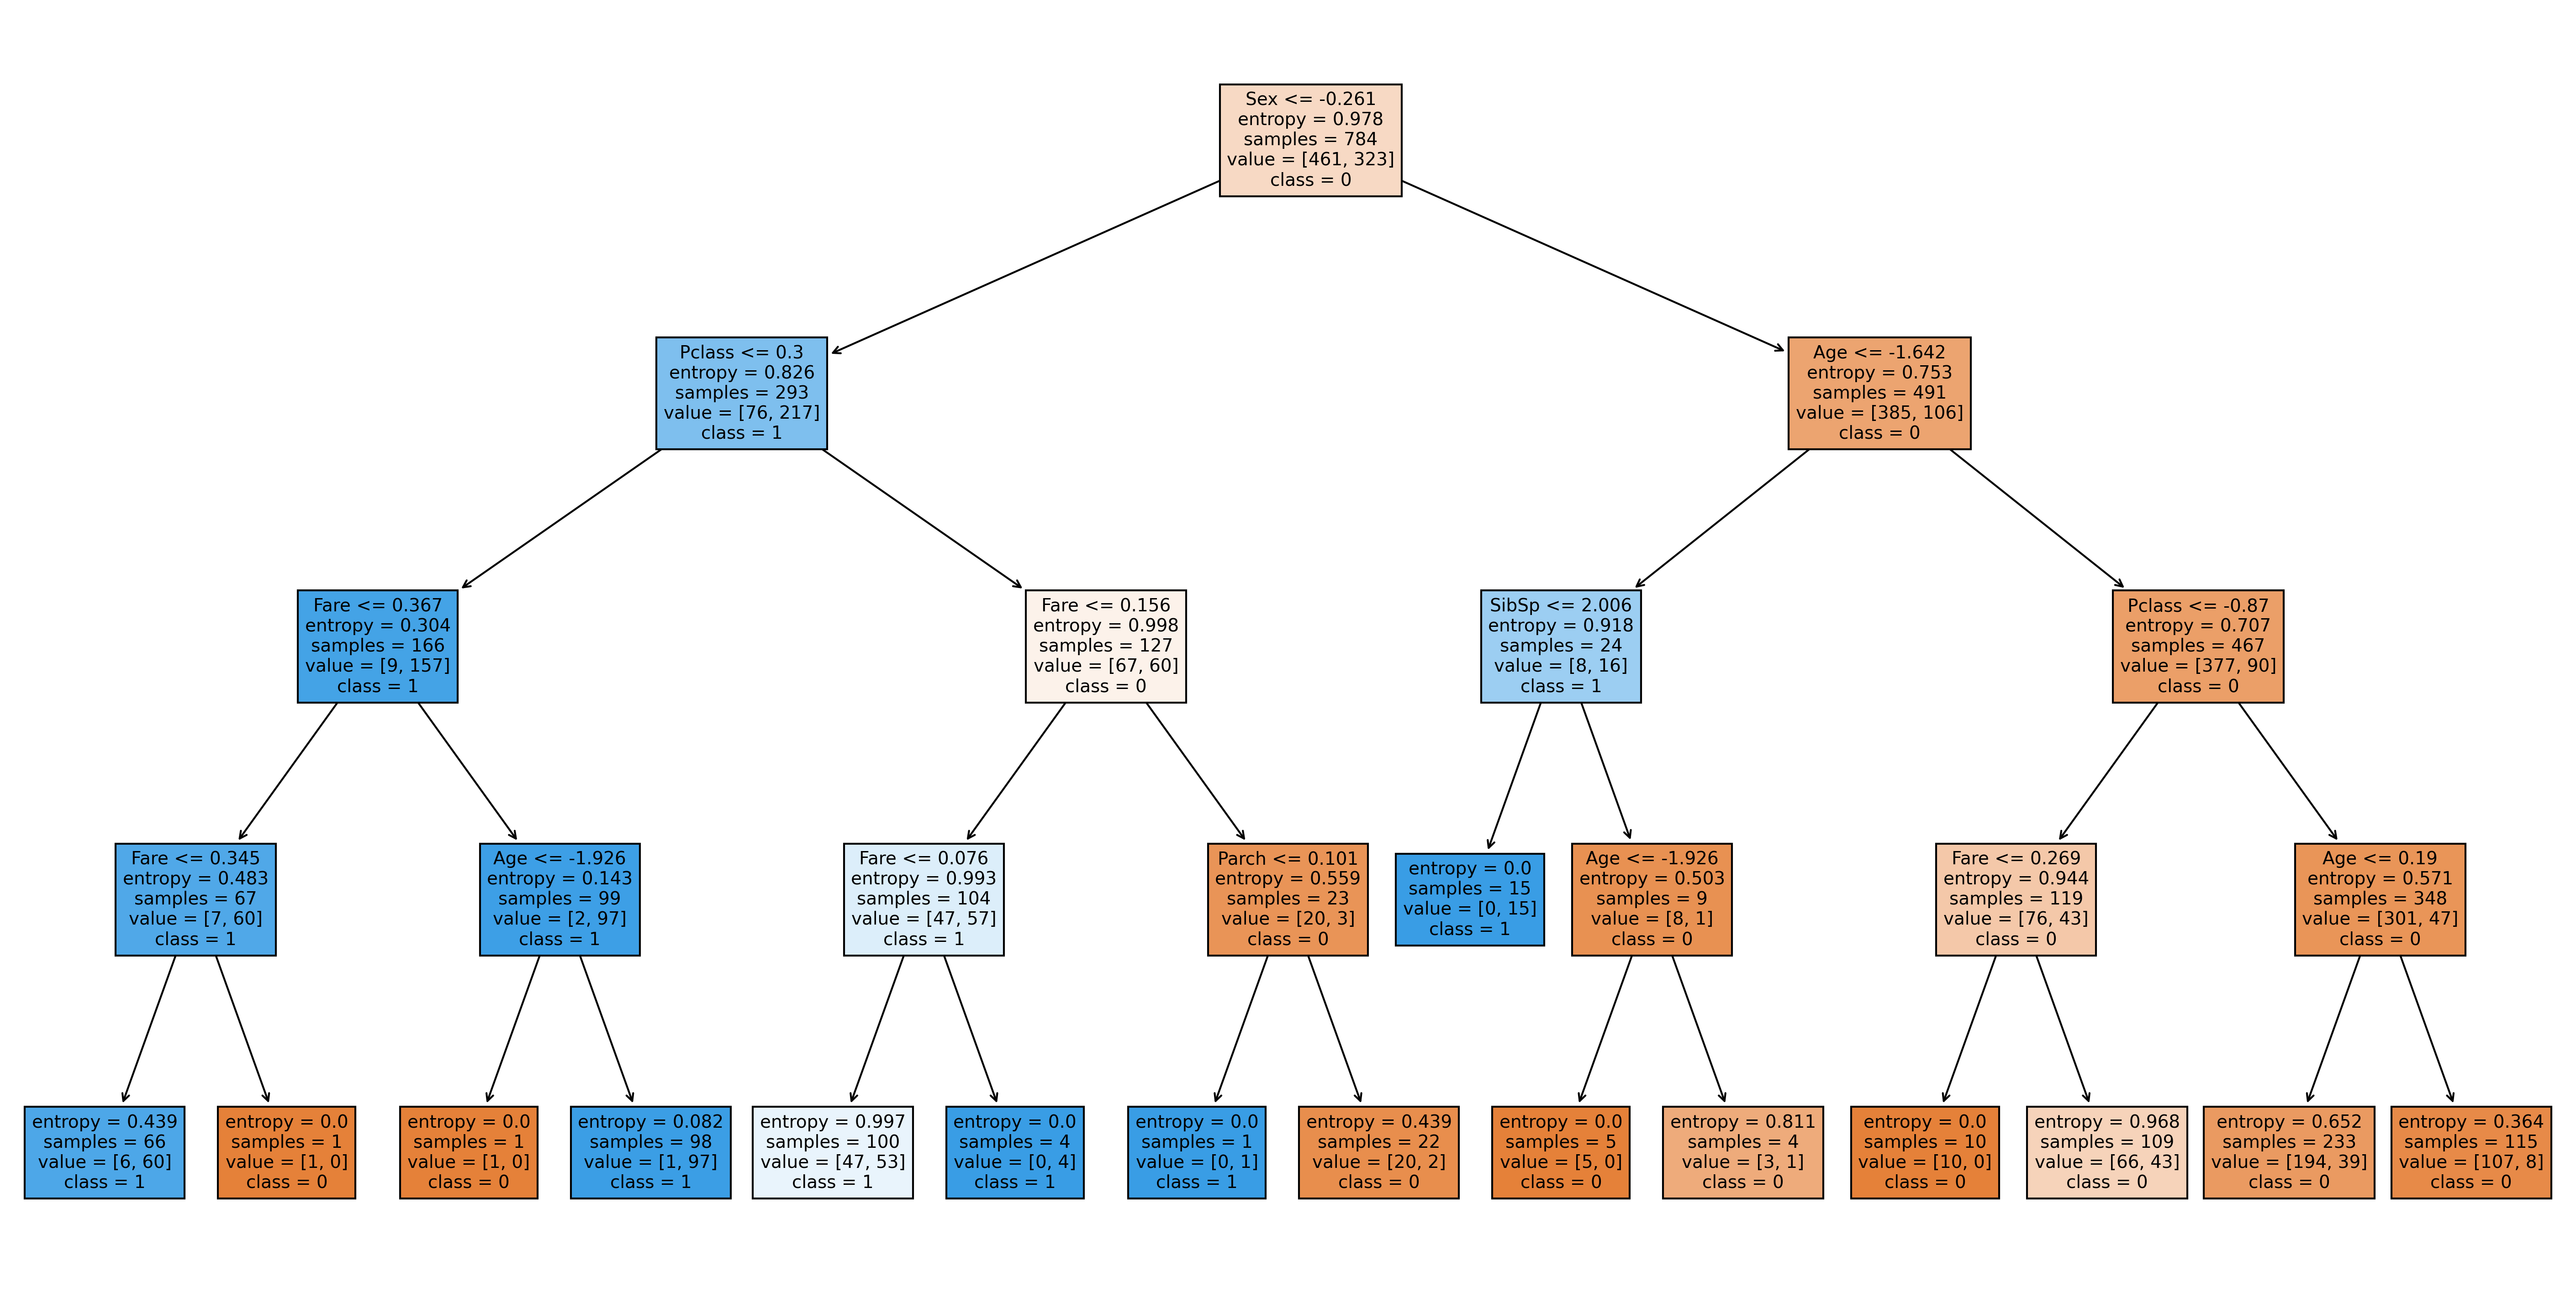

In [125]:
from sklearn.tree import plot_tree
plt.figure(figsize = (24,12),dpi = 300)

plot_tree(dt_model,filled = True,feature_names =['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'],class_names = ['0','1'])
plt.show()

In [126]:
X_train_imp.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

## RANDOM FOREST

In [127]:
## Base Model and Hyperparameter tuning
from sklearn.ensemble import RandomForestClassifier
estimator = RandomForestClassifier(random_state = 0)
## parameter Set
param_grid = {"n_estimators":list(range(1,101))}
grid = GridSearchCV(estimator,param_grid,cv = 5,scoring = 'accuracy')
grid.fit(X_train,y_train)
grid.best_params_

{'n_estimators': 47}

In [128]:
l = grid.best_estimator_.feature_importances_
l

array([0.08896871, 0.22940629, 0.29705748, 0.0534559 , 0.03502139,
       0.26764982, 0.00884326, 0.01959715])

In [129]:
imp_feature = pd.DataFrame(data = l,index = X_train.columns,columns = ['feature_percentage'])
imp_feature = imp_feature[imp_feature['feature_percentage']>0]
imp_feature = imp_feature.index
imp_feature

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Q', 'S'], dtype='object')

In [130]:
imp_X_train_rf = X_train[imp_feature]

In [131]:
## Final Model
rf_model = RandomForestClassifier(random_state = 0,n_estimators = 80)
rf_model.fit(imp_X_train_rf,y_train)

RandomForestClassifier(n_estimators=80, random_state=0)

In [132]:
## Prediction
ypred_train = rf_model.predict(imp_X_train_rf)

In [133]:
## Evolution
from sklearn.metrics import accuracy_score
print("Train Accuracy Score : ",accuracy_score(y_train,ypred_train))

## Cross validation Score
from sklearn.model_selection import cross_val_score
cross_validation_score = cross_val_score(rf_model,imp_X_train_rf,y_train,cv = 5,scoring = 'accuracy')
print("Cross Validation Score : ",cross_validation_score.mean())

Train Accuracy Score :  0.9834183673469388
Cross Validation Score :  0.7819369590070228


In [134]:
## This is a Worst Model.....

# BOOSTING

# ADA BOOSTING

In [135]:
## Base model and Hyperparameter Tuning
from sklearn.ensemble import AdaBoostClassifier
estimator = AdaBoostClassifier()
## Parameter set
param_grid = {"n_estimators":list(range(1,51))}
grid = GridSearchCV(estimator,param_grid,cv = 5,scoring = "accuracy")
grid.fit(X_train,y_train)
grid.best_params_

{'n_estimators': 37}

In [136]:
grid.best_estimator_.feature_importances_

array([0.05405405, 0.05405405, 0.37837838, 0.08108108, 0.02702703,
       0.37837838, 0.        , 0.02702703])

In [137]:
imp_feature = pd.DataFrame(data = grid.best_estimator_.feature_importances_,index = X_train.columns,columns = ['feature_percentage'])
imp_feature = imp_feature[imp_feature['feature_percentage']>0]
imp_feature = imp_feature.index
imp_feature

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'S'], dtype='object')

In [138]:
imp_X_train = X_train[imp_feature]

In [139]:
## Model with best Hyperparameter
ada_model = AdaBoostClassifier(n_estimators = 14)
ada_model.fit(imp_X_train,y_train)

AdaBoostClassifier(n_estimators=14)

In [140]:
## Prediction
ypred_train = ada_model.predict(imp_X_train)

In [141]:
## Evolution
from sklearn.metrics import accuracy_score
print("Train Accuracy Score : ",accuracy_score(y_train,ypred_train))

## Cross validation Score
from sklearn.model_selection import cross_val_score
cross_validation_score = cross_val_score(rf_model,imp_X_train,y_train,cv = 5,scoring = 'accuracy')
print("Cross Validation Score : ",cross_validation_score.mean())

Train Accuracy Score :  0.798469387755102
Cross Validation Score :  0.7640780663073656


## GRADIANT BOOSt

In [142]:
l = []
x = 0
while x<=1:
    l.append(x)
    x=x+0.01
l

[0,
 0.01,
 0.02,
 0.03,
 0.04,
 0.05,
 0.060000000000000005,
 0.07,
 0.08,
 0.09,
 0.09999999999999999,
 0.10999999999999999,
 0.11999999999999998,
 0.12999999999999998,
 0.13999999999999999,
 0.15,
 0.16,
 0.17,
 0.18000000000000002,
 0.19000000000000003,
 0.20000000000000004,
 0.21000000000000005,
 0.22000000000000006,
 0.23000000000000007,
 0.24000000000000007,
 0.25000000000000006,
 0.26000000000000006,
 0.2700000000000001,
 0.2800000000000001,
 0.2900000000000001,
 0.3000000000000001,
 0.3100000000000001,
 0.3200000000000001,
 0.3300000000000001,
 0.34000000000000014,
 0.35000000000000014,
 0.36000000000000015,
 0.37000000000000016,
 0.38000000000000017,
 0.3900000000000002,
 0.4000000000000002,
 0.4100000000000002,
 0.4200000000000002,
 0.4300000000000002,
 0.4400000000000002,
 0.45000000000000023,
 0.46000000000000024,
 0.47000000000000025,
 0.48000000000000026,
 0.49000000000000027,
 0.5000000000000002,
 0.5100000000000002,
 0.5200000000000002,
 0.5300000000000002,
 0.54000000

In [143]:
## Base model and hyperparameter tuning for gradiant boost
from sklearn.ensemble import GradientBoostingClassifier
estimator = GradientBoostingClassifier()
## Parameter set
param_grid = {"n_estimators":list(range(1,21)),"learning_rate":l}
grid = GridSearchCV(estimator,param_grid,cv = 5,scoring = 'accuracy')
grid.fit(X_train,y_train)
grid.best_params_

{'learning_rate': 0.7100000000000004, 'n_estimators': 13}

In [144]:
grid.best_estimator_.feature_importances_

array([0.18951156, 0.45535029, 0.14221578, 0.06393446, 0.0020378 ,
       0.13712204, 0.00389718, 0.00593089])

In [145]:
important_feature = pd.DataFrame(data = grid.best_estimator_.feature_importances_,index = X_train.columns,columns = ['percentage'])
important_feature = important_feature[important_feature['percentage']>0]
important_feature = important_feature.index
important_feature

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Q', 'S'], dtype='object')

In [146]:
imp_X_train_gb = X_train[important_feature]

In [147]:
## Best Model 
from sklearn.ensemble import GradientBoostingClassifier
gb_model =  GradientBoostingClassifier(n_estimators = 11,learning_rate = 0.48000000000000026)
gb_model.fit(imp_X_train_gb,y_train)

GradientBoostingClassifier(learning_rate=0.48000000000000026, n_estimators=11)

In [148]:
## Prediction
ypred_train = gb_model.predict(imp_X_train_gb)

In [149]:
## Evolution
from sklearn.metrics import accuracy_score
print("Train Accuracy Score : ",accuracy_score(y_train,ypred_train))

from sklearn.model_selection import cross_val_score
cross_validation_score = cross_val_score(gb_model,imp_X_train_gb,y_train,cv = 5,scoring = 'accuracy')
print("Cross Validation Score : ",cross_validation_score.mean())

Train Accuracy Score :  0.8533163265306123
Cross Validation Score :  0.7921607055365018


# XG BOOSTING

In [150]:
l = []
x = 0
while x<=1:
    l.append(x)
    x = x+0.01
l

[0,
 0.01,
 0.02,
 0.03,
 0.04,
 0.05,
 0.060000000000000005,
 0.07,
 0.08,
 0.09,
 0.09999999999999999,
 0.10999999999999999,
 0.11999999999999998,
 0.12999999999999998,
 0.13999999999999999,
 0.15,
 0.16,
 0.17,
 0.18000000000000002,
 0.19000000000000003,
 0.20000000000000004,
 0.21000000000000005,
 0.22000000000000006,
 0.23000000000000007,
 0.24000000000000007,
 0.25000000000000006,
 0.26000000000000006,
 0.2700000000000001,
 0.2800000000000001,
 0.2900000000000001,
 0.3000000000000001,
 0.3100000000000001,
 0.3200000000000001,
 0.3300000000000001,
 0.34000000000000014,
 0.35000000000000014,
 0.36000000000000015,
 0.37000000000000016,
 0.38000000000000017,
 0.3900000000000002,
 0.4000000000000002,
 0.4100000000000002,
 0.4200000000000002,
 0.4300000000000002,
 0.4400000000000002,
 0.45000000000000023,
 0.46000000000000024,
 0.47000000000000025,
 0.48000000000000026,
 0.49000000000000027,
 0.5000000000000002,
 0.5100000000000002,
 0.5200000000000002,
 0.5300000000000002,
 0.54000000

In [151]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [153]:
## Base Model and Choosing Hyperparameter
from xgboost import XGBClassifier
estimator = XGBClassifier()
## Parameter Set
pram_grid = {"n_estimator":[10,20,40,100],"max_depth":[1,2,3,4,5,6,7,None],"gamma":l}
grid = GridSearchCV(estimator,pram_grid,cv = 5,scoring = 'accuracy')
grid.fit(X_train,y_train)
grid.best_params_

{'gamma': 0.05, 'max_depth': 3, 'n_estimator': 10}

In [154]:
grid.best_estimator_.feature_importances_

array([0.2709111 , 0.5086682 , 0.03792336, 0.09550001, 0.02235564,
       0.03269236, 0.00359486, 0.02835459], dtype=float32)

In [155]:
important_feature = pd.DataFrame(data = grid.best_estimator_.feature_importances_,index = X_train.columns,columns = ['important_feature'])
important_feature = important_feature[important_feature['important_feature']>0]
important_feature = important_feature.index
important_feature

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Q', 'S'], dtype='object')

In [168]:
## Final Model
imp_X_train_xgb = X_train[important_feature]
xgb_model = XGBClassifier(n_estimators = 10,gamma = 0.05,max_depth = 3)
xgb_model.fit(imp_X_train_xgb,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.05, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [169]:
## Prediction
ypred_train = xgb_model.predict(imp_X_train_xgb)

In [170]:
## Evolution
from sklearn.metrics import accuracy_score
print("Train Accuracy Score : ",accuracy_score(y_train,ypred_train))

from sklearn.model_selection import cross_val_score
cross_validation_score = cross_val_score(xgb_model,imp_X_train_xgb,y_train,cv = 5,scoring = 'accuracy')
print("Cross Validation Score : ",cross_validation_score.mean())

Train Accuracy Score :  0.8303571428571429
Cross Validation Score :  0.7909031520496489


In [171]:
## Predict for test
X_test = X_test[important_feature]
ypred_test = xgb_model.predict(X_test)

In [172]:
ypred_test.shape

(418,)

In [173]:
ypred_test

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [174]:
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,0.885158,0.772490,0.350287,-0.530599,-0.497157,-0.895518,3.505444,-1.632039
1,0.885158,-1.294515,1.239484,0.484009,-0.497157,-0.997741,-0.285271,0.612730
2,-0.285102,0.772490,2.306521,-0.530599,-0.497157,-0.697535,3.505444,-1.632039
3,0.885158,0.772490,-0.183231,-0.530599,-0.497157,-0.802038,-0.285271,0.612730
4,0.885158,-1.294515,-0.538910,0.484009,0.698460,-0.471837,-0.285271,0.612730
...,...,...,...,...,...,...,...,...
413,0.885158,0.772490,0.243584,-0.530599,-0.497157,-0.869916,-0.285271,0.612730
414,-1.455362,-1.294515,0.670398,-0.530599,-0.497157,1.718038,-0.285271,-1.632039
415,0.885158,0.772490,0.634830,-0.530599,-0.497157,-0.965846,-0.285271,0.612730
416,0.885158,0.772490,0.812670,-0.530599,-0.497157,-0.869916,-0.285271,0.612730


In [175]:
a = pd.read_csv("test.csv")
a

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [176]:
passid = a['PassengerId'].values
passid

array([ 892,  893,  894,  895,  896,  897,  898,  899,  900,  901,  902,
        903,  904,  905,  906,  907,  908,  909,  910,  911,  912,  913,
        914,  915,  916,  917,  918,  919,  920,  921,  922,  923,  924,
        925,  926,  927,  928,  929,  930,  931,  932,  933,  934,  935,
        936,  937,  938,  939,  940,  941,  942,  943,  944,  945,  946,
        947,  948,  949,  950,  951,  952,  953,  954,  955,  956,  957,
        958,  959,  960,  961,  962,  963,  964,  965,  966,  967,  968,
        969,  970,  971,  972,  973,  974,  975,  976,  977,  978,  979,
        980,  981,  982,  983,  984,  985,  986,  987,  988,  989,  990,
        991,  992,  993,  994,  995,  996,  997,  998,  999, 1000, 1001,
       1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012,
       1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023,
       1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034,
       1035, 1036, 1037, 1038, 1039, 1040, 1041, 10

In [177]:
df_final = pd.DataFrame({"PassengerId":passid,"Survived":ypred_test})

In [178]:
df_final

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [179]:
df_final.to_csv("Submission.csv",index=False)